# DF/DN on FSDD

In [1]:
# Import necessary packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os

In [2]:
# Define color palette
sns.set(color_codes=True, style="white", context="talk", font_scale=1.5)

In [3]:
def load_result(filename):
    """
    Loads results from specified file
    """
    input = open(filename, "r")
    lines = input.readlines()
    ls = []
    for line in lines:
        ls.append(float(line.strip()))
    return ls


def produce_mean(ls):
    """
    Produces means from list of 6 results
    """
    ls_space = []
    for i in range(int(len(ls) / 6)):
        l = ls[i * 6 : (i + 1) * 6]
        ls_space.append(l)

    return np.mean(ls_space, axis=0)


def plot_acc(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 6 : (k + 1) * 6],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][3][k * 6 : (k + 1) * 6],
            color="#377eb8",
            linestyle="dotted",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][4][k * 6 : (k + 1) * 6],
            color="#4daf4a",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="CNN-2L",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
            label="ResNet-18",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
            label="CNN-5L",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][3]),
            linewidth=5,
            color="#377eb8",
            linestyle="dotted",
        )

In [5]:
# Define working directory
directory = "../benchmarks/audition/"

acc_3 = [
    load_result(directory + "3_class/naive_rf_kappa.txt"),
    load_result(directory + "3_class/cnn32_kappa.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa.txt"),
    load_result(directory + "3_class/resnet18_kappa.txt"),
]

acc_8 = [
    load_result(directory + "8_class/naive_rf.txt"),
    load_result(directory + "8_class/cnn32.txt"),
    load_result(directory + "8_class/cnn32_2l.txt"),
    load_result(directory + "8_class/cnn32_5l.txt"),
    load_result(directory + "8_class/resnet18.txt"),
]

acc_3_mel = [
    load_result(directory + "3_class_mel/naive_rf_kappa.txt"),
    load_result(directory + "3_class_mel/cnn32_kappa.txt"),
    load_result(directory + "3_class_mel/cnn32_2l_kappa.txt"),
    load_result(directory + "3_class_mel/cnn32_5l_kappa.txt"),
    load_result(directory + "3_class_mel/resnet18_kappa.txt"),
]

acc_8_mel = [
    load_result(directory + "8_class_mel/naive_rf.txt"),
    load_result(directory + "8_class_mel/cnn32.txt"),
    load_result(directory + "8_class_mel/cnn32_2l.txt"),
    load_result(directory + "8_class_mel/cnn32_5l.txt"),
    load_result(directory + "8_class_mel/resnet18.txt"),
]

acc_3_mfcc = [
    load_result(directory + "3_class_mfcc/naive_rf.txt"),
    load_result(directory + "3_class_mfcc/cnn32.txt"),
    load_result(directory + "3_class_mfcc/cnn32_2l.txt"),
    load_result(directory + "3_class_mfcc/cnn32_5l.txt"),
    load_result(directory + "3_class_mfcc/resnet18.txt"),
]

acc_8_mfcc = [
    load_result(directory + "8_class_mfcc/naive_rf.txt"),
    load_result(directory + "8_class_mfcc/cnn32.txt"),
    load_result(directory + "8_class_mfcc/cnn32_2l.txt"),
    load_result(directory + "8_class_mfcc/cnn32_5l.txt"),
    load_result(directory + "8_class_mfcc/resnet18.txt"),
]


accs = [acc_3, acc_8]
accs_mel = [acc_3_mel, acc_8_mel]
accs_mfcc = [acc_3_mfcc, acc_8_mfcc]

## DF/DN with Spectrogram

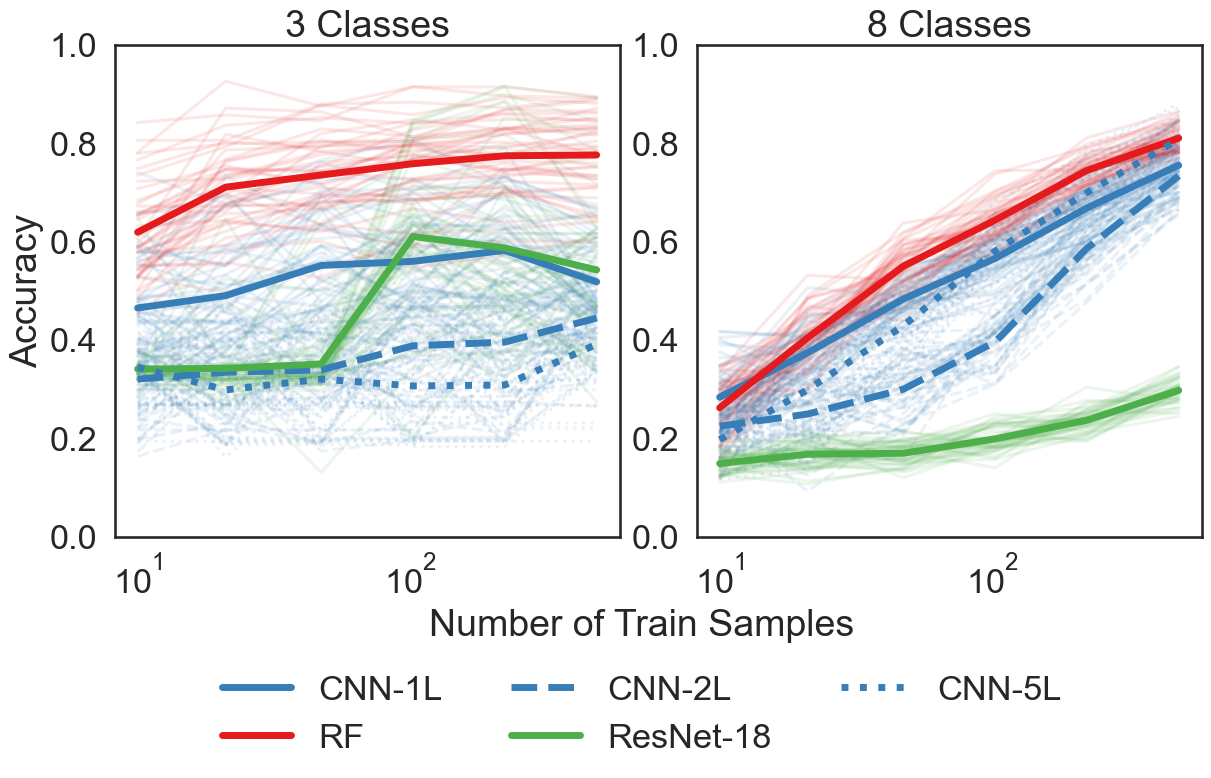

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, accs, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)

leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/spoken.pdf", transparent=True, bbox_inches="tight")

# Plots for hyperparameters tuned for 3 classes

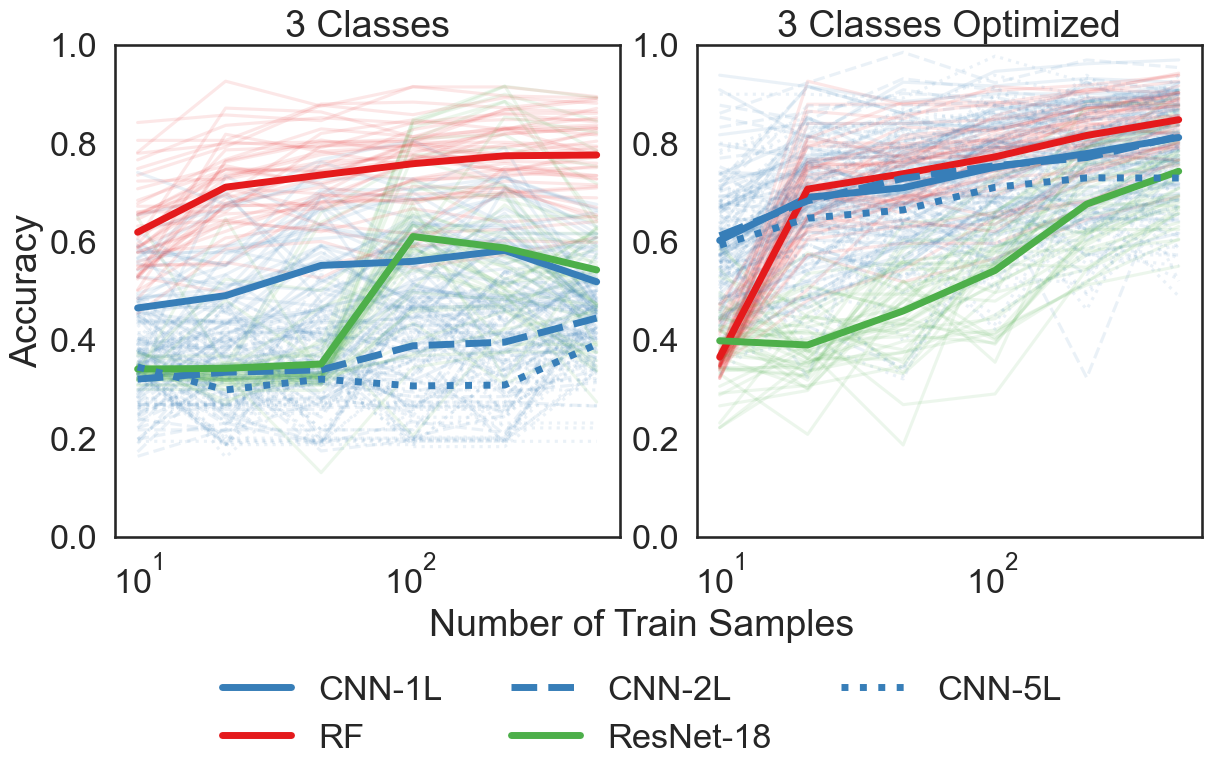

In [6]:
acc_3 = [
    load_result(directory + "3_class/naive_rf_kappa.txt"),
    load_result(directory + "3_class/cnn32_kappa.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa.txt"),
    load_result(directory + "3_class/resnet18_kappa.txt"),
]

acc_3_best = [
    load_result(directory + "3_class/naive_rf_kappa_best.txt"),
    load_result(directory + "3_class/cnn32_kappa_best.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa_best.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa_best.txt"),
    load_result(directory + "3_class/resnet18_kappa_best.txt"),
]
best = [acc_3, acc_3_best]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "3 Classes Optimized"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/optimized_3class.pdf", transparent=True, bbox_inches="tight")

# Plots for BO vs SMAC

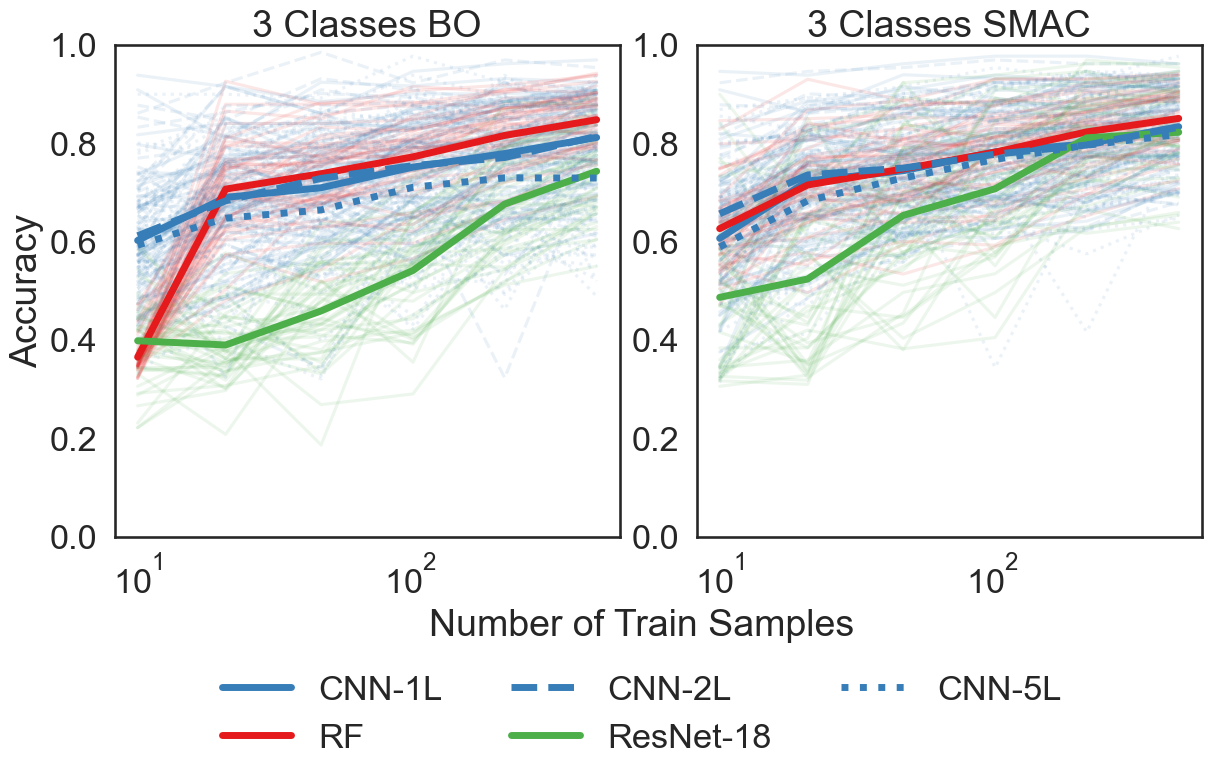

In [7]:
acc_3_best = [
    load_result(directory + "3_class/naive_rf_kappa_best.txt"),
    load_result(directory + "3_class/cnn32_kappa_best.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa_best.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa_best.txt"),
    load_result(directory + "3_class/resnet18_kappa_best.txt"),
]

acc_3_smac = [
    load_result(directory + "3_class/naive_rf_kappa_best_smac.txt"),
    load_result(directory + "3_class/cnn32_kappa_best_smac.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa_best_smac.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa_best_smac.txt"),
    load_result(directory + "3_class/resnet18_kappa_best_smac.txt"),
]

best = [acc_3_best, acc_3_smac]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes BO", "3 Classes SMAC"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/BO_vs_Smac_3class.pdf", transparent=True, bbox_inches="tight")

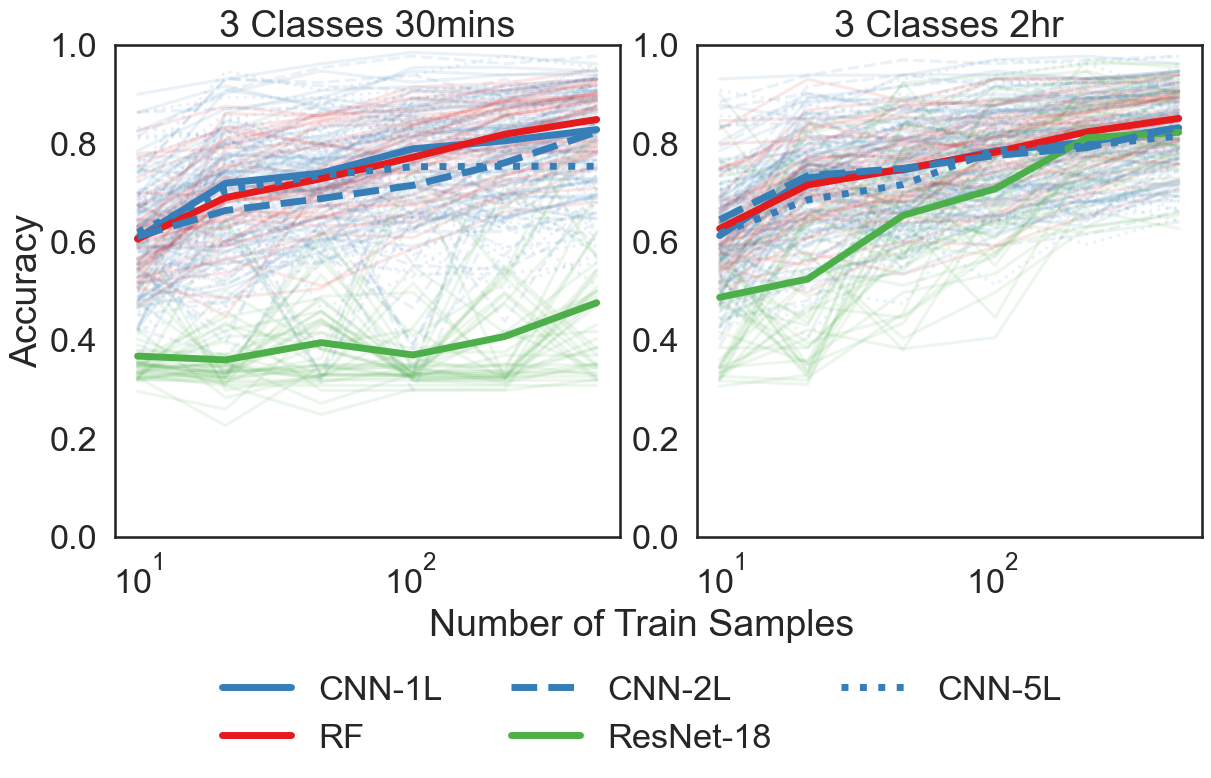

In [8]:
acc_3_30mins = [
    load_result(directory + "3_class/naive_rf_kappa_best_30min.txt"),
    load_result(directory + "3_class/cnn32_kappa_best_30min.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa_best_30min.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa_best_30min.txt"),
    load_result(directory + "3_class/resnet18_kappa_best_30min.txt"),
]

acc_3_2hr = [
    load_result(directory + "3_class/naive_rf_kappa_best_smac.txt"),
    load_result(directory + "3_class/cnn32_kappa_best_2hr.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa_best_2hr.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa_best_2hr.txt"),
    load_result(directory + "3_class/resnet18_kappa_best_smac.txt"),
]

best = [acc_3_30mins, acc_3_2hr]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes 30mins", "3 Classes 2hr"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/30mins_vs_2hr_3class.pdf", transparent=True, bbox_inches="tight")

# Comparison of each models(3-class)

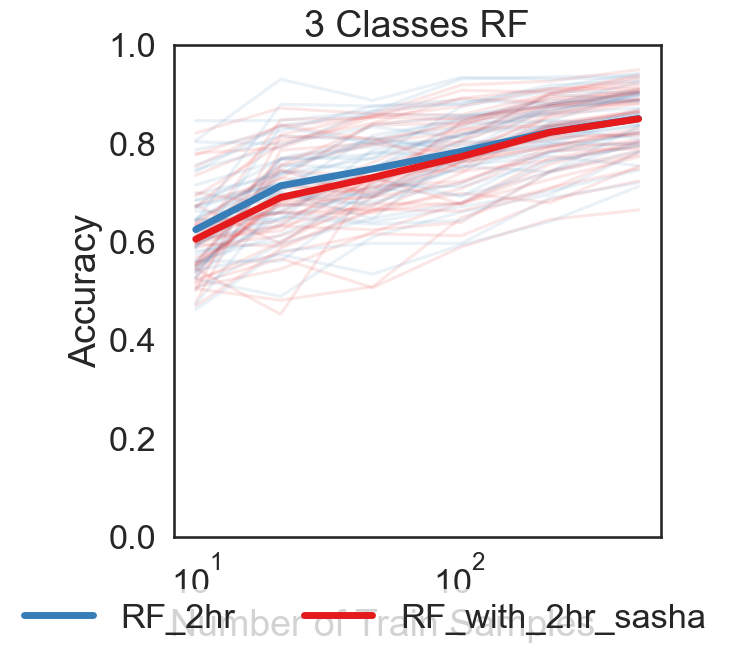

In [9]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_with_2hr_sasha",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "3_class/naive_rf_kappa_best_2hr_sasha.txt"),
    load_result(directory + "3_class/naive_rf_kappa_best_2hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes RF")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/3class_RF.pdf", transparent=True, bbox_inches="tight")



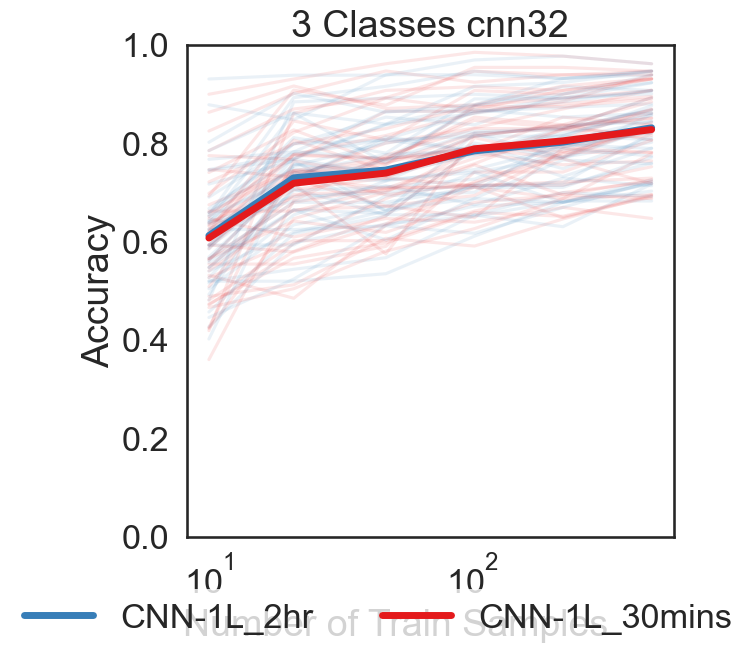

In [10]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-1L_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN-1L_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32 = [
    load_result(directory + "3_class/cnn32_kappa_best_30min.txt"),
    load_result(directory + "3_class/cnn32_kappa_best_2hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes cnn32")

plot_acc_comparison(ax, [CNN32], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/3class_cnn32.pdf", transparent=True, bbox_inches="tight")



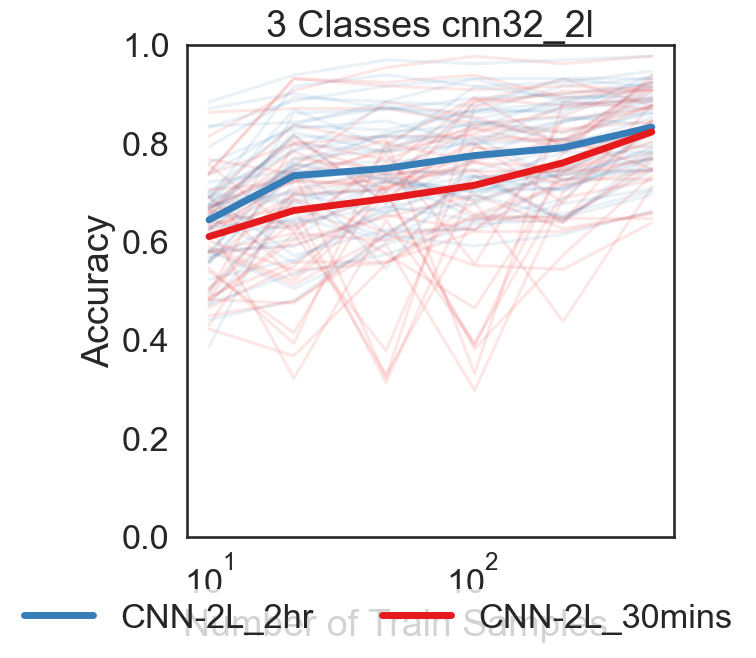

In [11]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-2L_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN-2L_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_2l = [
    load_result(directory + "3_class/cnn32_2l_kappa_best_30min.txt"),
    load_result(directory + "3_class/cnn32_2l_kappa_best_2hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes cnn32_2l")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/3class_cnn32_2l.pdf", transparent=True, bbox_inches="tight")



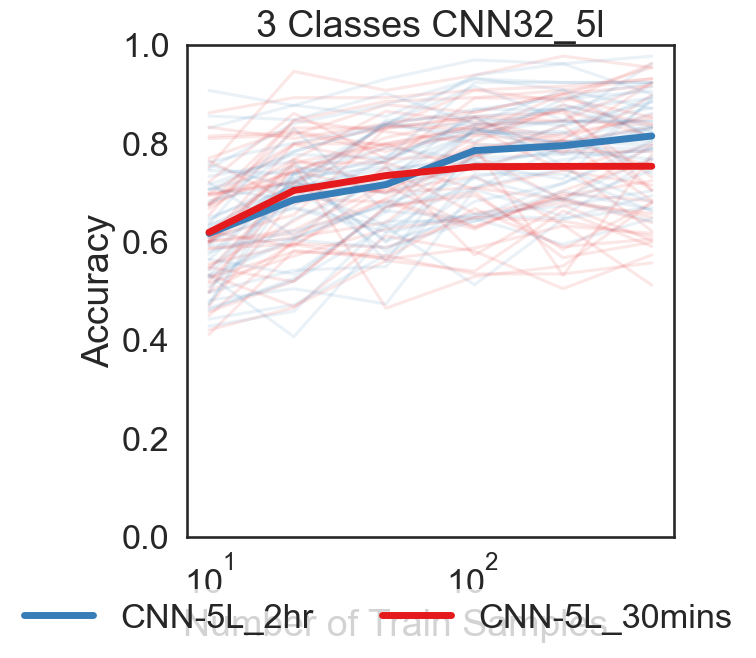

In [12]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-5L_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN-5L_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_5l = [
    load_result(directory + "3_class/cnn32_5l_kappa_best_30min.txt"),
    load_result(directory + "3_class/cnn32_5l_kappa_best_2hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes CNN32_5l")

plot_acc_comparison(ax, [CNN32_5l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/3class_cnn32_5l.pdf", transparent=True, bbox_inches="tight")



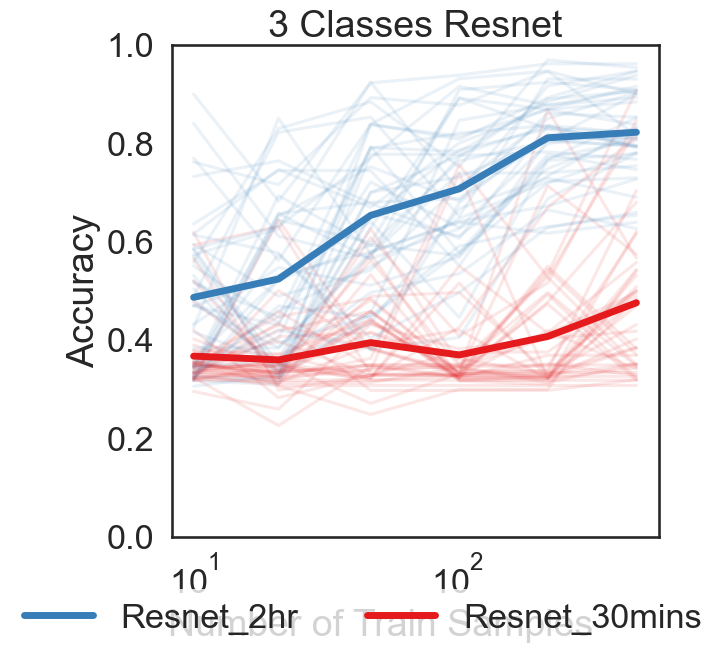

In [13]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


Resnet = [
    load_result(directory + "3_class/resnet18_kappa_best_30min.txt"),
    load_result(directory + "3_class/resnet18_kappa_best_smac.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("3 Classes Resnet")

plot_acc_comparison(ax, [Resnet], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/3class_Resnet.pdf", transparent=True, bbox_inches="tight")



# Plots for hyperparameter tuned for 8 classes

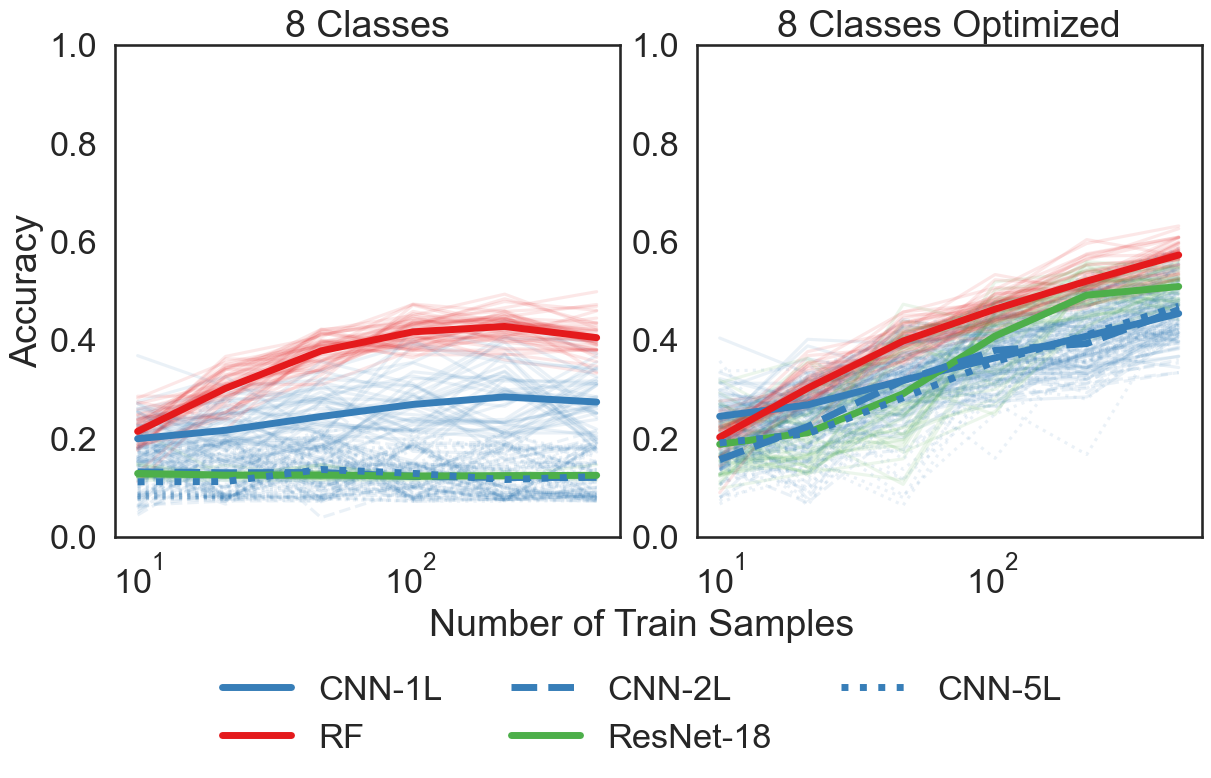

In [14]:
acc_8 = [
    load_result(directory + "8_class/naive_rf_kappa.txt"),
    load_result(directory + "8_class/cnn32_kappa.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa.txt"),
    load_result(directory + "8_class/resnet18_kappa.txt"),
]

acc_8_best = [
    load_result(directory + "8_class/naive_rf_kappa_best.txt"),
    load_result(directory + "8_class/cnn32_kappa_best.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best.txt"),
    load_result(directory + "8_class/resnet18_kappa_best.txt"),
]
best = [acc_8, acc_8_best]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["8 Classes", "8 Classes Optimized"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/BO_vs_Smac_8class.pdf", transparent=True, bbox_inches="tight")

# Smac for 8 classes

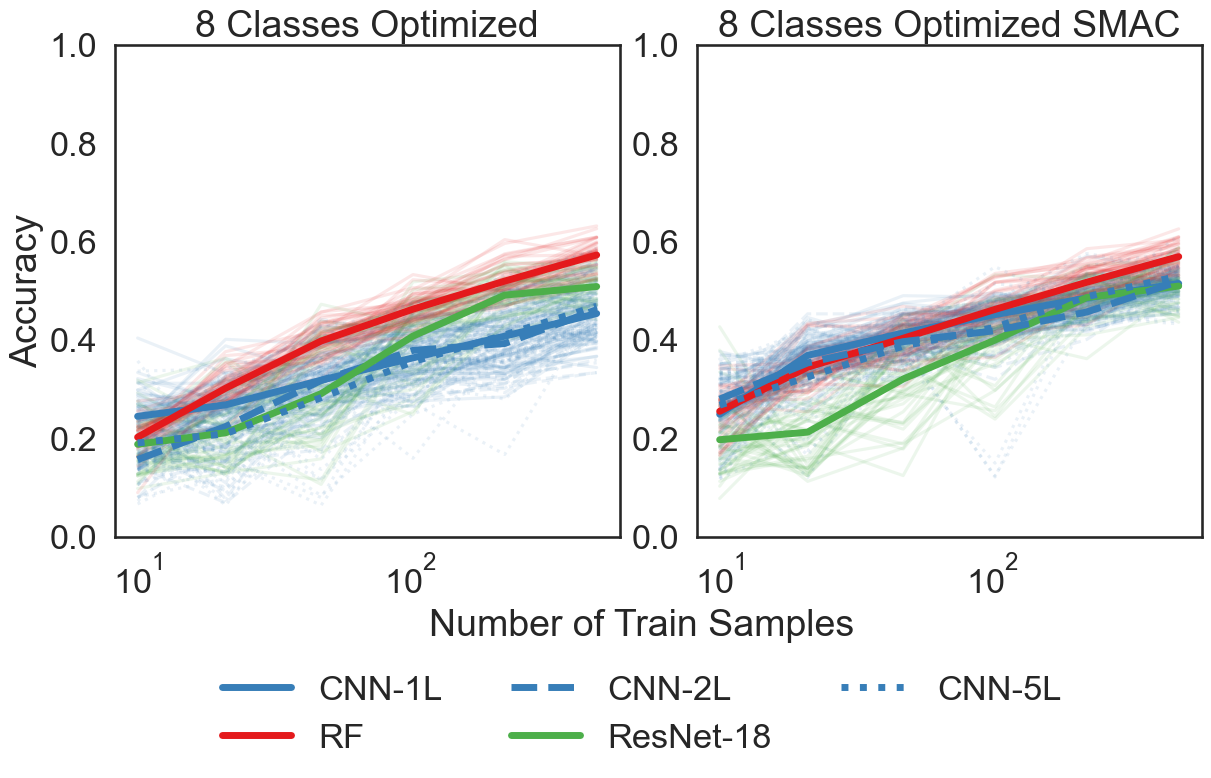

In [15]:
acc_8_best = [
    load_result(directory + "8_class/naive_rf_kappa_best.txt"),
    load_result(directory + "8_class/cnn32_kappa_best.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best.txt"),
    load_result(directory + "8_class/resnet18_kappa_best.txt"),
]

acc_8_best_smac = [
    load_result(directory + "8_class/naive_rf_kappa_best_smac.txt"),
    load_result(directory + "8_class/cnn32_kappa_best_smac.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best_smac.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best_smac.txt"),
    load_result(directory + "8_class/resnet18_kappa_best_smac.txt"),
]

best = [acc_8_best, acc_8_best_smac]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["8 Classes Optimized", "8 Classes Optimized SMAC"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/optimized_8class.pdf", transparent=True, bbox_inches="tight")

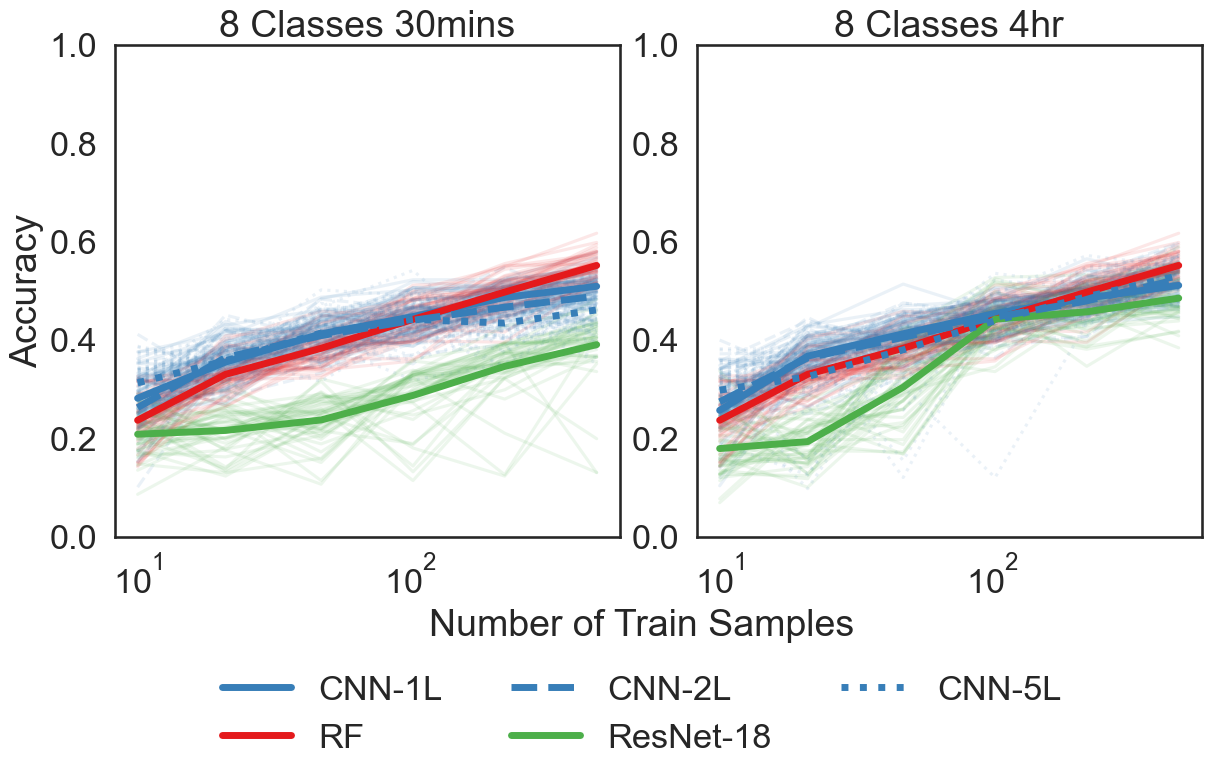

In [16]:
acc_8_30mins = [
    load_result(directory + "8_class/naive_rf_kappa_best_30mins.txt"),
    load_result(directory + "8_class/cnn32_kappa_best_30mins.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best_30mins.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best_30mins.txt"),
    load_result(directory + "8_class/resnet18_kappa_best_30mins.txt"),
]

acc_8_2hr = [
    load_result(directory + "8_class/naive_rf_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best_2hr.txt"),
    load_result(directory + "8_class/resnet18_kappa_best_2hr.txt"),
]

acc_8_4hr = [
    load_result(directory + "8_class/naive_rf_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_kappa_best_4hr.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best_4hr.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best_4hr.txt"),
    load_result(directory + "8_class/resnet18_kappa_best_4hr.txt"),
]

best = [acc_8_30mins, acc_8_4hr]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["8 Classes 30mins", "8 Classes 4hr"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/30mins_vs_4hr_8class.pdf", transparent=True, bbox_inches="tight")

In [17]:
# Comparison of 8 class models

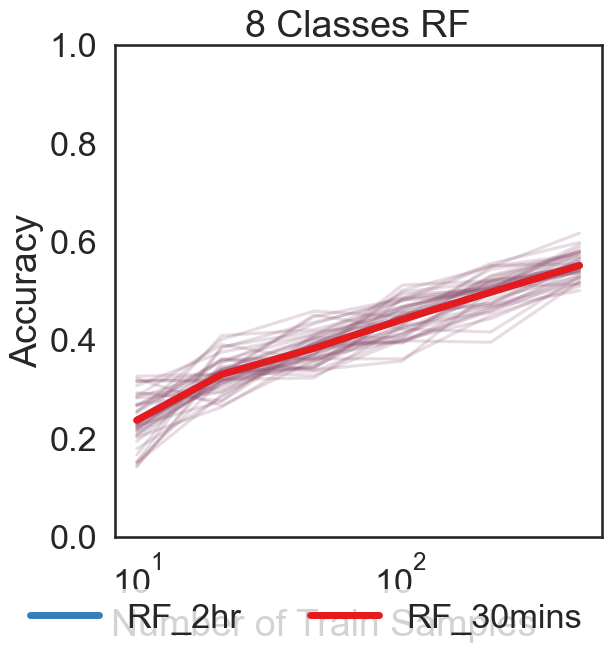

In [18]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


RF = [
    load_result(directory + "8_class/naive_rf_kappa_best_30mins.txt"),
    load_result(directory + "8_class/naive_rf_kappa_best_2hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes RF")

plot_acc_comparison(ax, [RF], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/8class_RF.pdf", transparent=True, bbox_inches="tight")



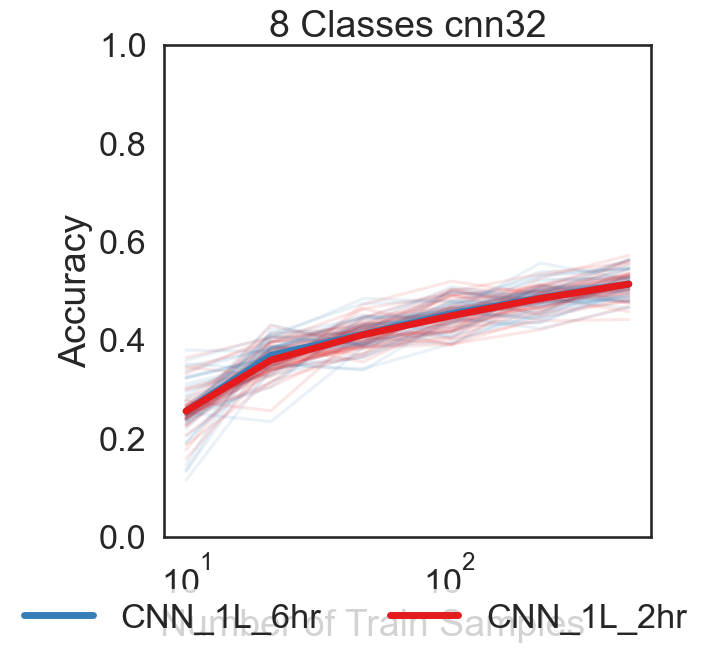

In [19]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN_1L_6hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN_1L_2hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32 = [
    load_result(directory + "8_class/cnn32_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_kappa_best_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes cnn32")

plot_acc_comparison(ax, [CNN32], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/8class_cnn32.pdf", transparent=True, bbox_inches="tight")



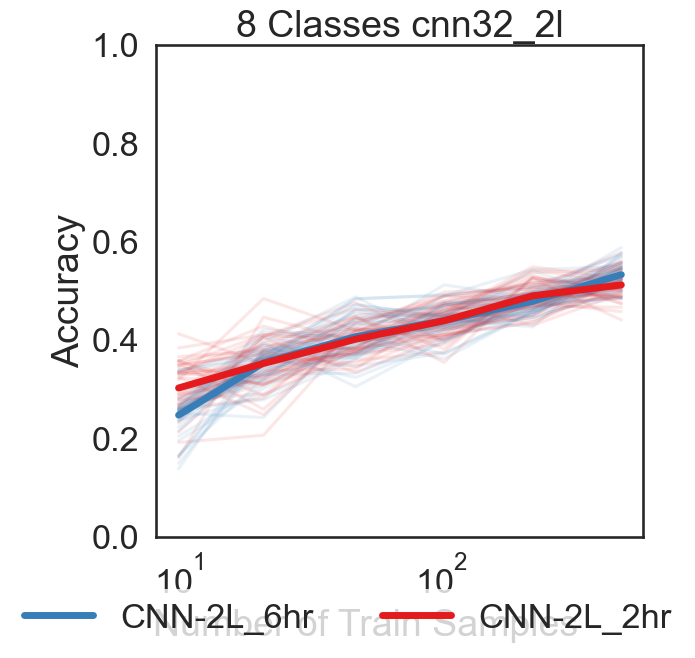

In [20]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-2L_6hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN-2L_2hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_2l = [
    load_result(directory + "8_class/cnn32_2l_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_2l_kappa_best_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes cnn32_2l")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/8class_cnn32_2l.pdf", transparent=True, bbox_inches="tight")



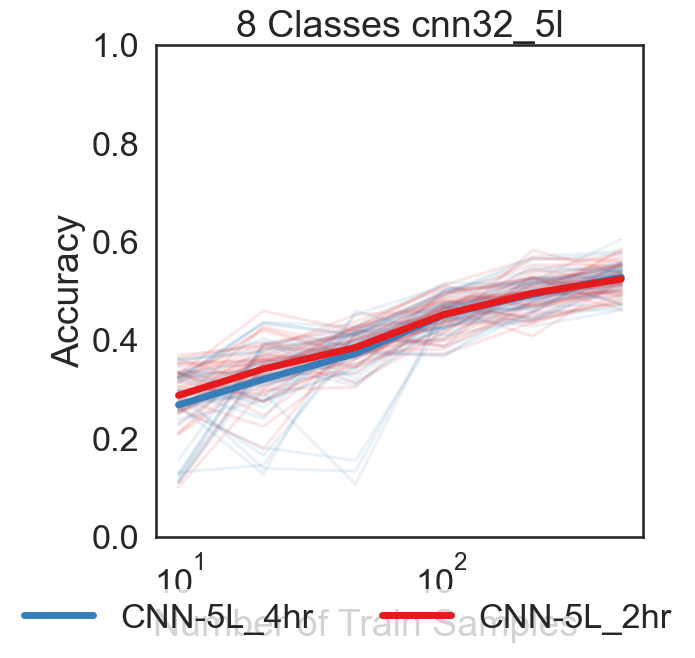

In [21]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN-5L_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN-5L_2hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_2l = [
    load_result(directory + "8_class/cnn32_5l_kappa_best_2hr.txt"),
    load_result(directory + "8_class/cnn32_5l_kappa_best_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes cnn32_5l")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/8class_cnn32_5l.pdf", transparent=True, bbox_inches="tight")

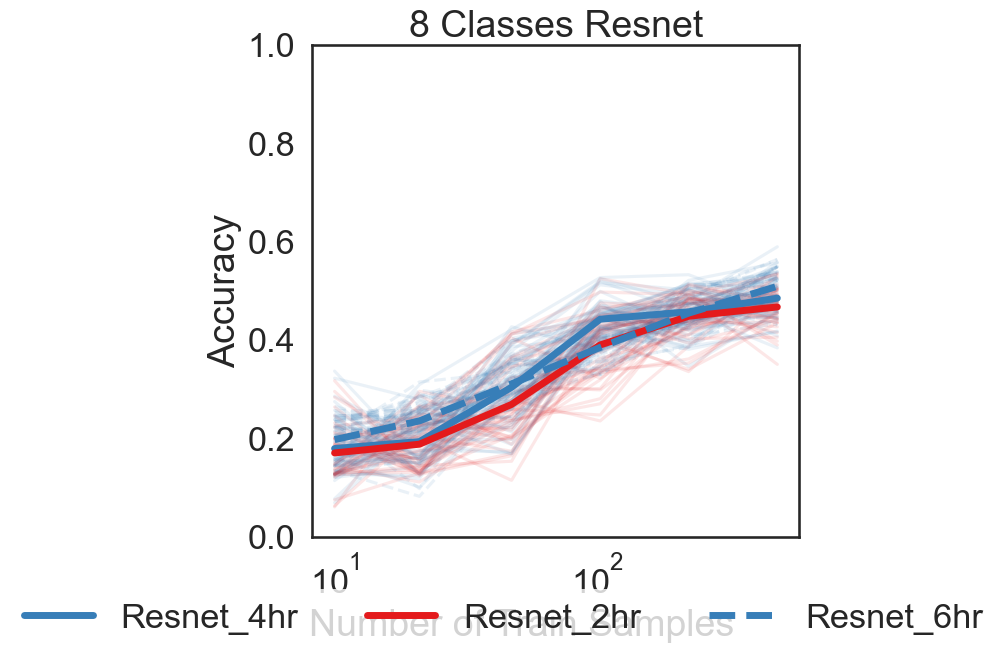

In [22]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][2][k * 6 : (k + 1) * 6],
            color="#377eb8",
            linestyle="dashed",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_2hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][2]),
            linewidth=5,
            color="#377eb8",
            linestyle="dashed",
            label="Resnet_6hr",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][4]),
            linewidth=5,
            color="#4daf4a",
        )


CNN32_2l = [
    load_result(directory + "8_class/resnet18_kappa_best_2hr.txt"),
    load_result(directory + "8_class/resnet18_kappa_best_4hr.txt"),
    load_result(directory + "8_class/resnet18_kappa_best_6hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("8 Classes Resnet")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/8class_resnet18.pdf", transparent=True, bbox_inches="tight")

# Plots for hyperparameter tuned for 15 classes

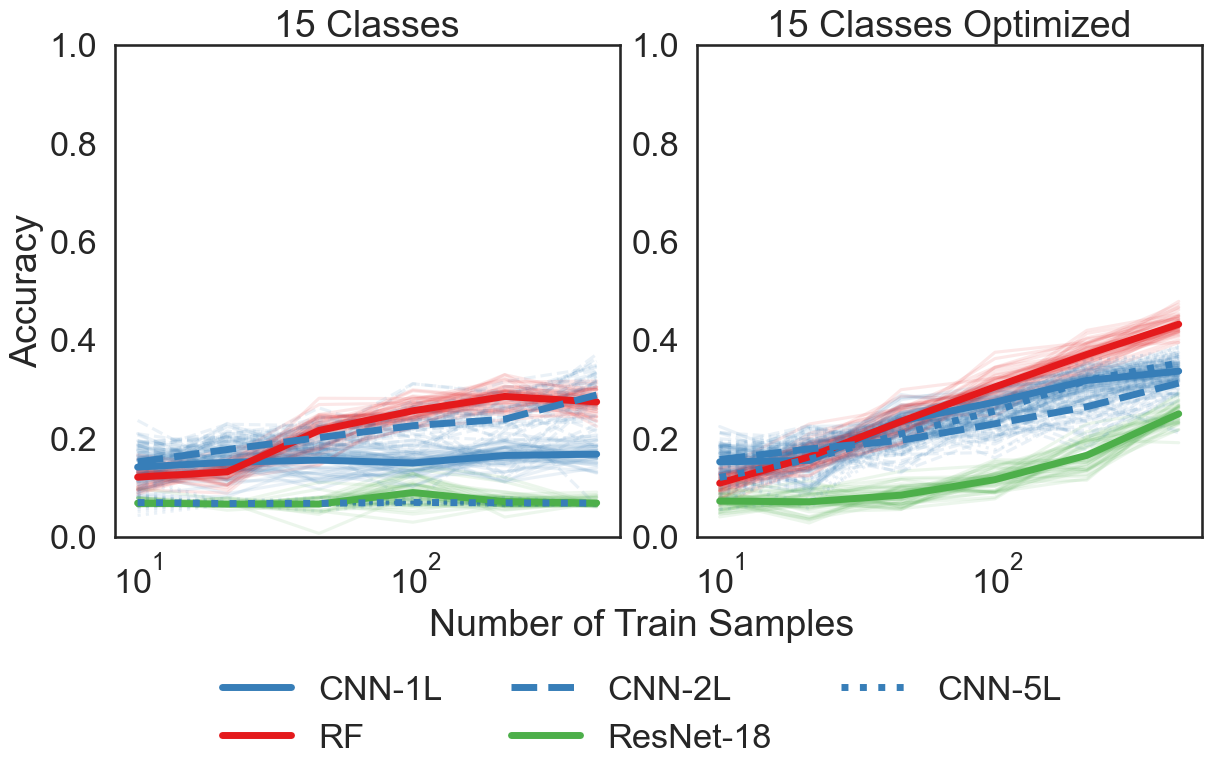

In [5]:
acc_15 = [
    load_result(directory + "15_class/naive_rf_kappa.txt"),
    load_result(directory + "15_class/cnn32_kappa.txt"),
    load_result(directory + "15_class/cnn32_2l_kappa.txt"),
    load_result(directory + "15_class/cnn32_5l_kappa.txt"),
    load_result(directory + "15_class/resnet18_kappa.txt"),
]

acc_15_best = [
    load_result(directory + "15_class/naive_rf_kappa_best.txt"),
    load_result(directory + "15_class/cnn32_kappa_best.txt"),
    load_result(directory + "15_class/cnn32_2l_kappa_best.txt"),
    load_result(directory + "15_class/cnn32_5l_kappa_best.txt"),
    load_result(directory + "15_class/resnet18_kappa_best.txt"),
]
best = [acc_15, acc_15_best]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 450, num=6, dtype=int)
xtitles = ["15 Classes", "15 Classes Optimized"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, best, i)
    if i == 0:
        col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/optimized_15class.pdf", transparent=True, bbox_inches="tight")

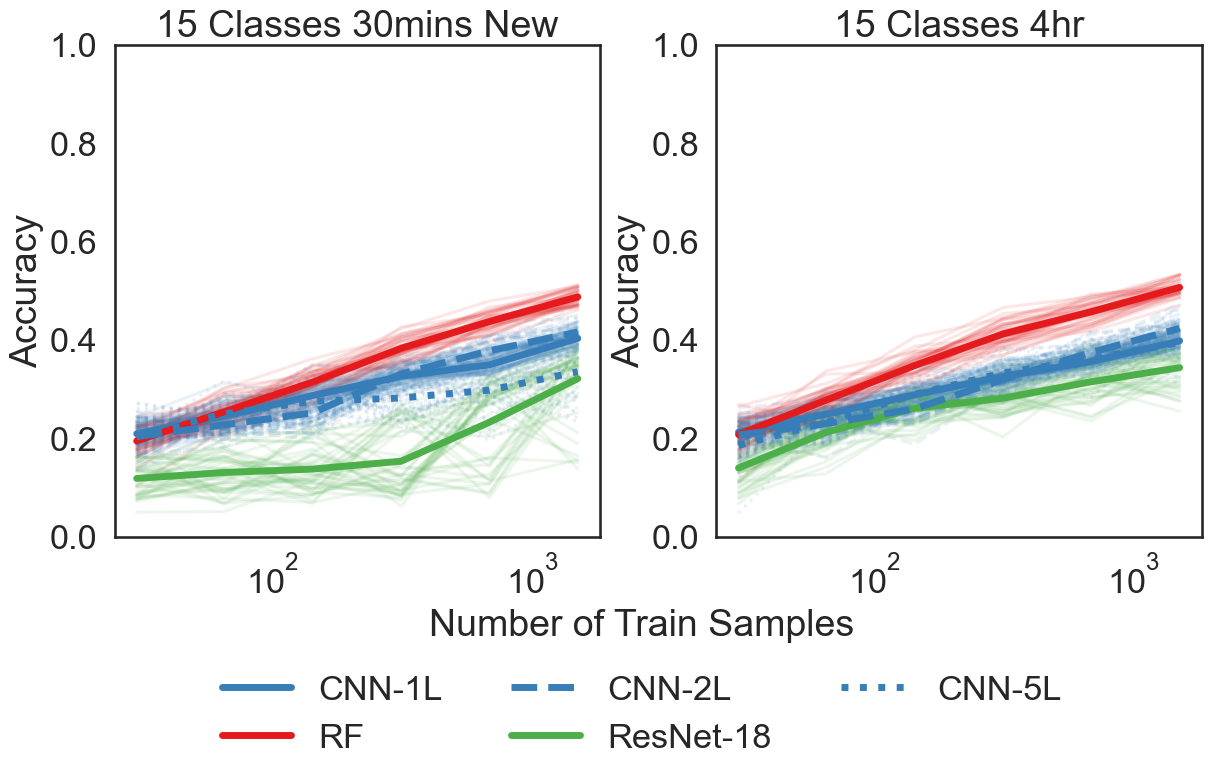

In [56]:
acc_15_30mins = [
    load_result(directory + "15_class/naive_rf_acc_30mins.txt"),
    load_result(directory + "15_class/cnn32_acc_30mins.txt"),
    load_result(directory + "15_class/cnn32_2l_acc_30mins.txt"),
    load_result(directory + "15_class/cnn32_5l_acc_30mins.txt"),
    load_result(directory + "15_class/resnet18_acc_30mins.txt"),
]

acc_15_2hr = [
    load_result(directory + "15_class/naive_rf_kappa_best_2hr.txt"),
    load_result(directory + "15_class/cnn32_kappa_best_2hr.txt"),
    load_result(directory + "15_class/cnn32_2l_kappa_best_2hr.txt"),
    load_result(directory + "15_class/cnn32_5l_kappa_best_2hr.txt"),
    load_result(directory + "15_class/resnet18_kappa_best_2hr.txt"),
]

acc_15_4hr = [
    load_result(directory + "15_class/naive_rf_acc_4hr.txt"),
    load_result(directory + "15_class/cnn32_acc_4hr.txt"),
    load_result(directory + "15_class/cnn32_2l_acc_4hr.txt"),
    load_result(directory + "15_class/cnn32_5l_acc_4hr.txt"),
    load_result(directory + "15_class/resnet18_acc_4hr.txt"),
]

best = [acc_15_30mins, acc_15_4hr]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(30, 1500, num=6, dtype=int)

xtitles = ["15 Classes 30mins New", "15 Classes 4hr"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])
    col.set_ylabel("Accuracy")
    # col.set_xlim([10, 2000])

    # Label x axis and plot figures
    if i == 0:
        plot_acc(col, best, i)
    else:
        plot_acc(col, best, i)
    col.set_title(xtitles[i])
    # plot_acc(col, best, i)
    # if i == 0:
    #     col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/30mins_vs_4hr_15class.pdf", transparent=True, bbox_inches="tight")

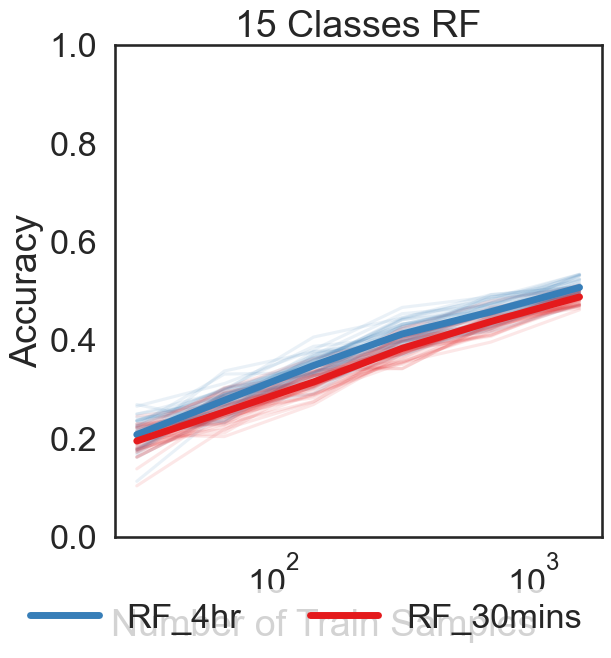

In [11]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="RF_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="RF_30mins",
        )
    # else:
    #     col.plot(
    #         samples_space_2hrs,
    #         produce_mean(accs[pos][1]),
    #         linewidth=5,
    #         color="#377eb8",
    #     )
    #     col.plot(
    #         samples_space_30mins,
    #         produce_mean(accs[pos][0]),
    #         linewidth=5,
    #         color="#e41a1c",
    #     )


CNN32_2l = [
    load_result(directory + "15_class/naive_rf_acc_30mins.txt"),
    load_result(directory + "15_class/naive_rf_acc_4hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("15 Classes RF")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/15class_RF.pdf", transparent=True, bbox_inches="tight")

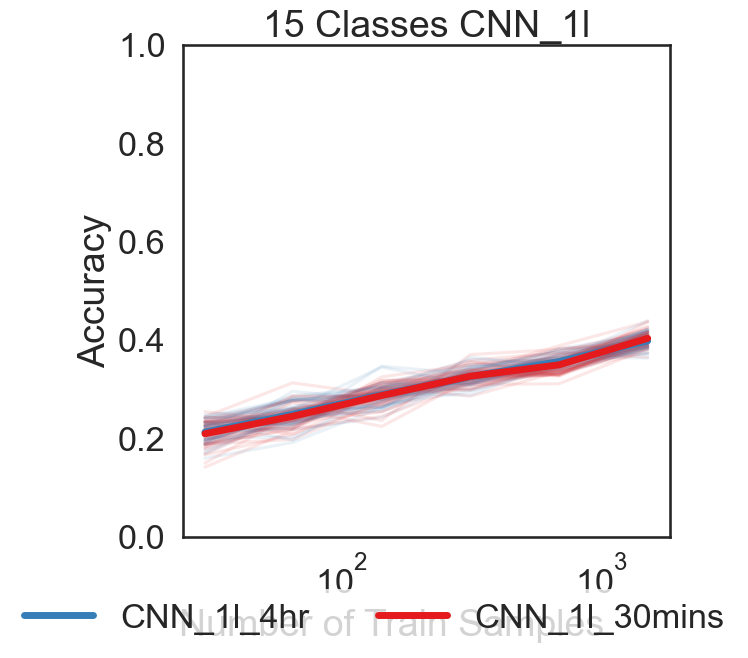

In [16]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN_1l_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN_1l_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_2l = [
    load_result(directory + "15_class/cnn32_acc_30mins.txt"),
    load_result(directory + "15_class/cnn32_acc_4hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("15 Classes CNN_1l")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/15class_CNN_1l.pdf", transparent=True, bbox_inches="tight")

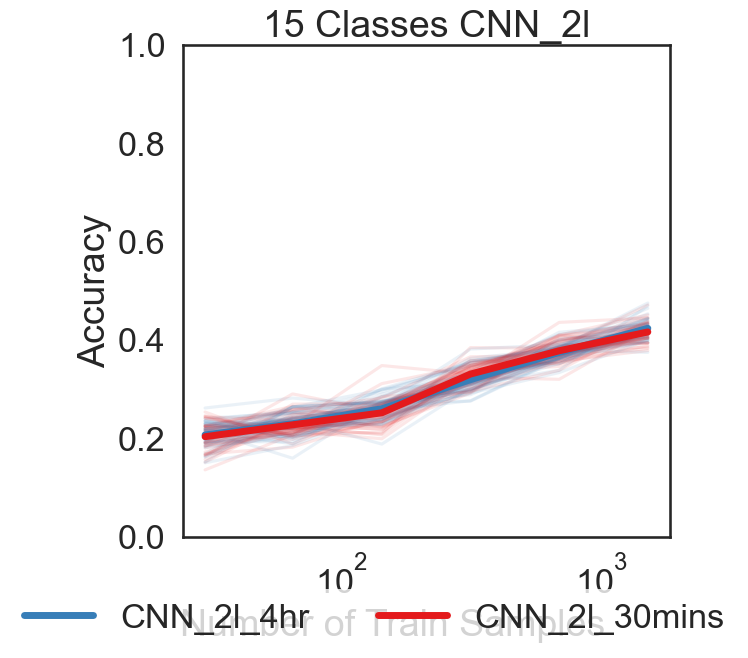

In [23]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN_2l_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN_2l_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_2l = [
    load_result(directory + "15_class/cnn32_2l_acc_30mins.txt"),
    load_result(directory + "15_class/cnn32_2l_acc_4hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("15 Classes CNN_2l")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/15class_CNN_2l.pdf", transparent=True, bbox_inches="tight")

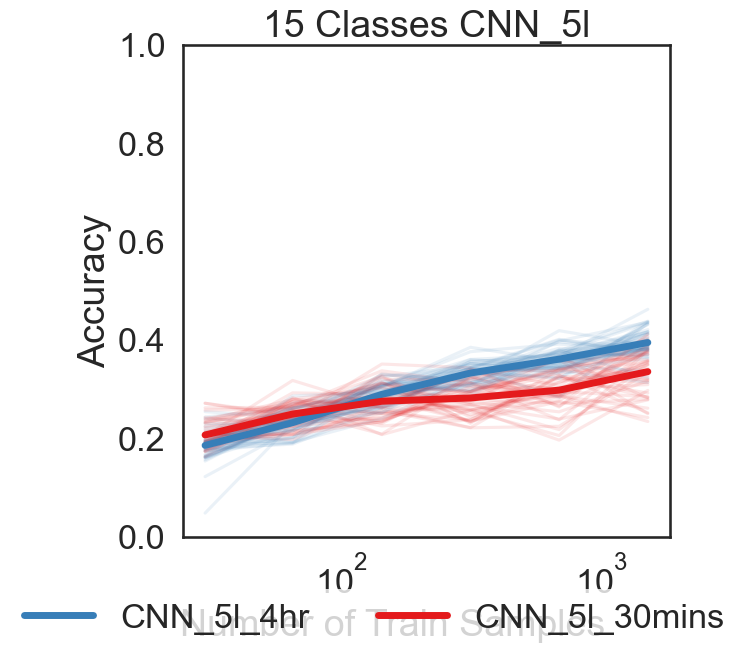

In [31]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="CNN_5l_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="CNN_5l_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )


CNN32_2l = [
    load_result(directory + "15_class/cnn32_5l_acc_30mins.txt"),
    load_result(directory + "15_class/cnn32_5l_acc_4hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("15 Classes CNN_5l")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/15class_CNN_5l.pdf", transparent=True, bbox_inches="tight")

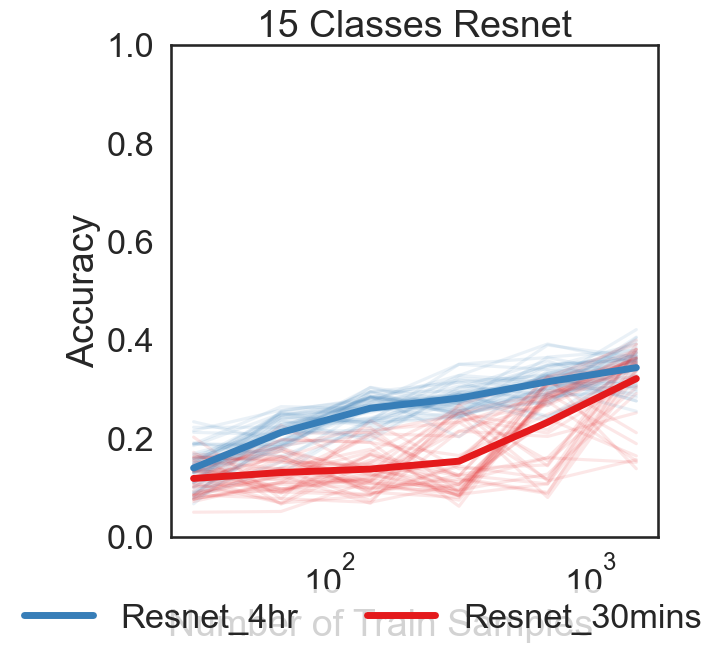

In [57]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(45):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        col.plot(
            samples_space,
            accs[pos][1][k * 6 : (k + 1) * 6],
            color="#377eb8",
            alpha=0.1,
        )

    if pos == 0:
        # Plot mean results
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
            label="Resnet_4hr",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_30mins",
        )
    else:
        col.plot(
            samples_space,
            produce_mean(accs[pos][1]),
            linewidth=5,
            color="#377eb8",
        )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
        )

        


CNN32_2l = [
    load_result(directory + "15_class/resnet18_acc_30mins.txt"),
    load_result(directory + "15_class/resnet18_acc_4hr.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("15 Classes Resnet")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/15class_resnet18.pdf", transparent=True, bbox_inches="tight")

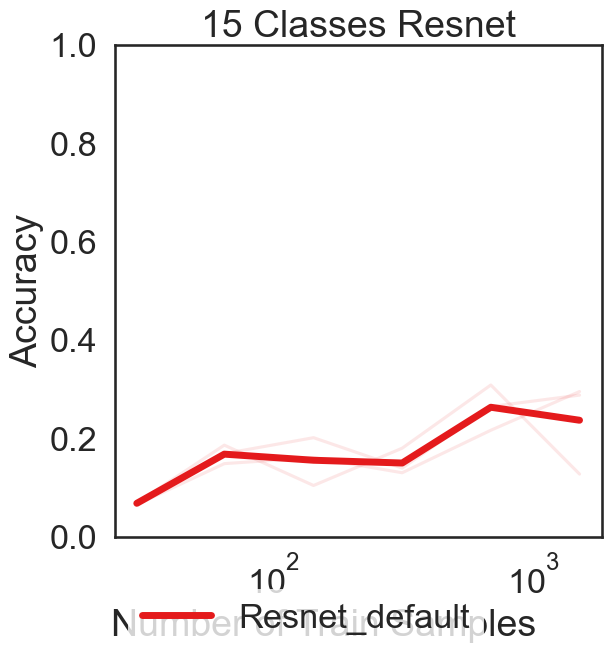

In [58]:
def plot_acc_comparison(col, accs, pos):
    # Plot low alpha results
    for k in range(3):
        col.plot(
            samples_space,
            accs[pos][0][k * 6 : (k + 1) * 6],
            color="#e41a1c",
            alpha=0.1,
        )
        # col.plot(
        #     samples_space,
        #     accs[pos][1][k * 6 : (k + 1) * 6],
        #     color="#377eb8",
        #     alpha=0.1,
        # )

    if pos == 0:
        # Plot mean results
        # col.plot(
        #     samples_space,
        #     produce_mean(accs[pos][1]),
        #     linewidth=5,
        #     color="#377eb8",
        #     label="Resnet_4hr",
        # )
        col.plot(
            samples_space,
            produce_mean(accs[pos][0]),
            linewidth=5,
            color="#e41a1c",
            label="Resnet_default",
        )


        


CNN32_2l = [
    # load_result(directory + "15_class/resnet18_acc_30mins.txt"),
    load_result(directory + "15_class/resnet18_acc_default1.txt"),
    ]



fig, ax = plt.subplots(figsize=(6, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")

ax.set_xscale("log")
ax.set_ylim([0, 1])
ax.set_ylabel("Accuracy")
ax.set_title("15 Classes Resnet")

plot_acc_comparison(ax, [CNN32_2l], 0)


leg = fig.legend(
    bbox_to_anchor=(0.5, -0.1),
    loc="lower center",
    ncol=3
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)

plt.savefig("../paper/figures/15class_resnet18.pdf", transparent=True, bbox_inches="tight")

# ECE

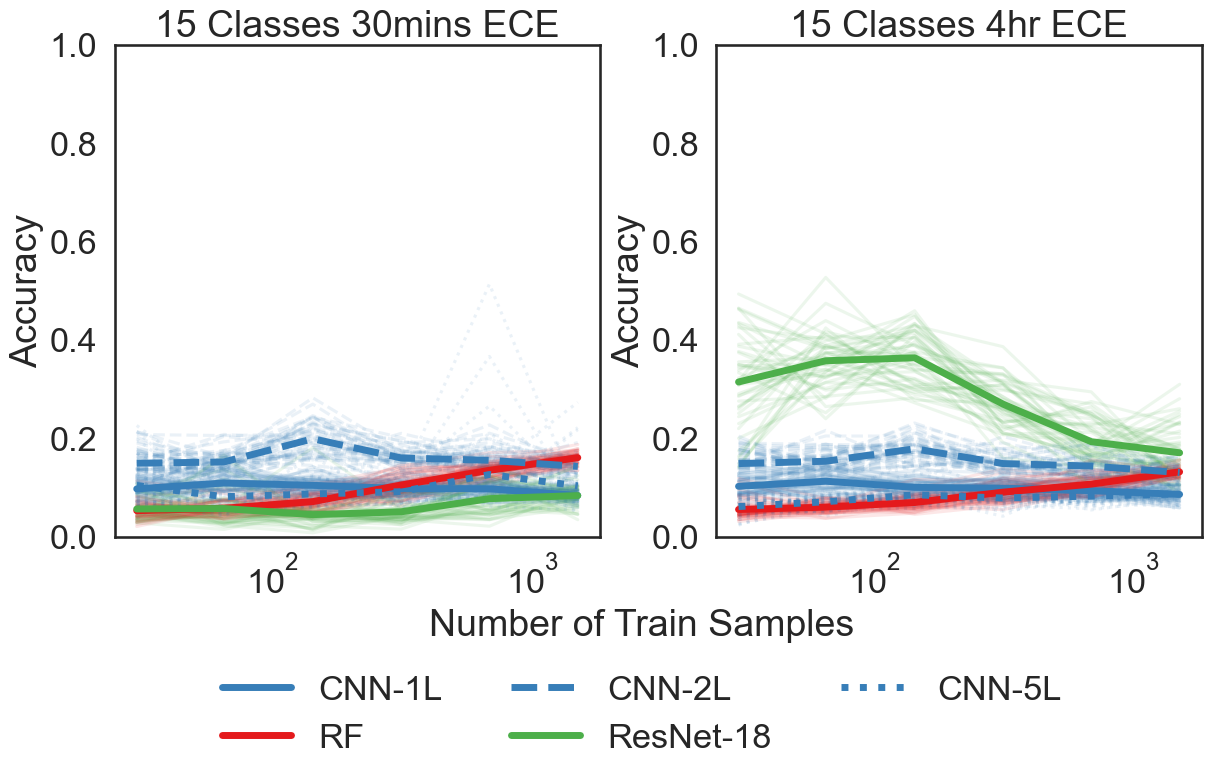

In [59]:
acc_15_30mins_ece = [
    load_result(directory + "15_class/naive_rf_ece_30mins.txt"),
    load_result(directory + "15_class/cnn32_ece_30mins.txt"),
    load_result(directory + "15_class/cnn32_2l_ece_30mins.txt"),
    load_result(directory + "15_class/cnn32_5l_ece_30mins.txt"),
    load_result(directory + "15_class/resnet18_ece_30mins.txt"),
]

acc_15_4hr_ece = [
    load_result(directory + "15_class/naive_rf_ece_4hr.txt"),
    load_result(directory + "15_class/cnn32_ece_4hr.txt"),
    load_result(directory + "15_class/cnn32_2l_ece_4hr.txt"),
    load_result(directory + "15_class/cnn32_5l_ece_4hr.txt"),
    load_result(directory + "15_class/resnet18_ece_4hr.txt"),
]

best = [acc_15_30mins_ece, acc_15_4hr_ece]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(30, 1500, num=6, dtype=int)

xtitles = ["15 Classes 30mins ECE", "15 Classes 4hr ECE"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])
    col.set_ylabel("Accuracy")
    # col.set_xlim([10, 2000])

    # Label x axis and plot figures
    if i == 0:
        plot_acc(col, best, i)
    else:
        plot_acc(col, best, i)
    col.set_title(xtitles[i])
    # plot_acc(col, best, i)
    # if i == 0:
    #     col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/30mins_vs_4hr_15class_ece.pdf", transparent=True, bbox_inches="tight")

# Kappa

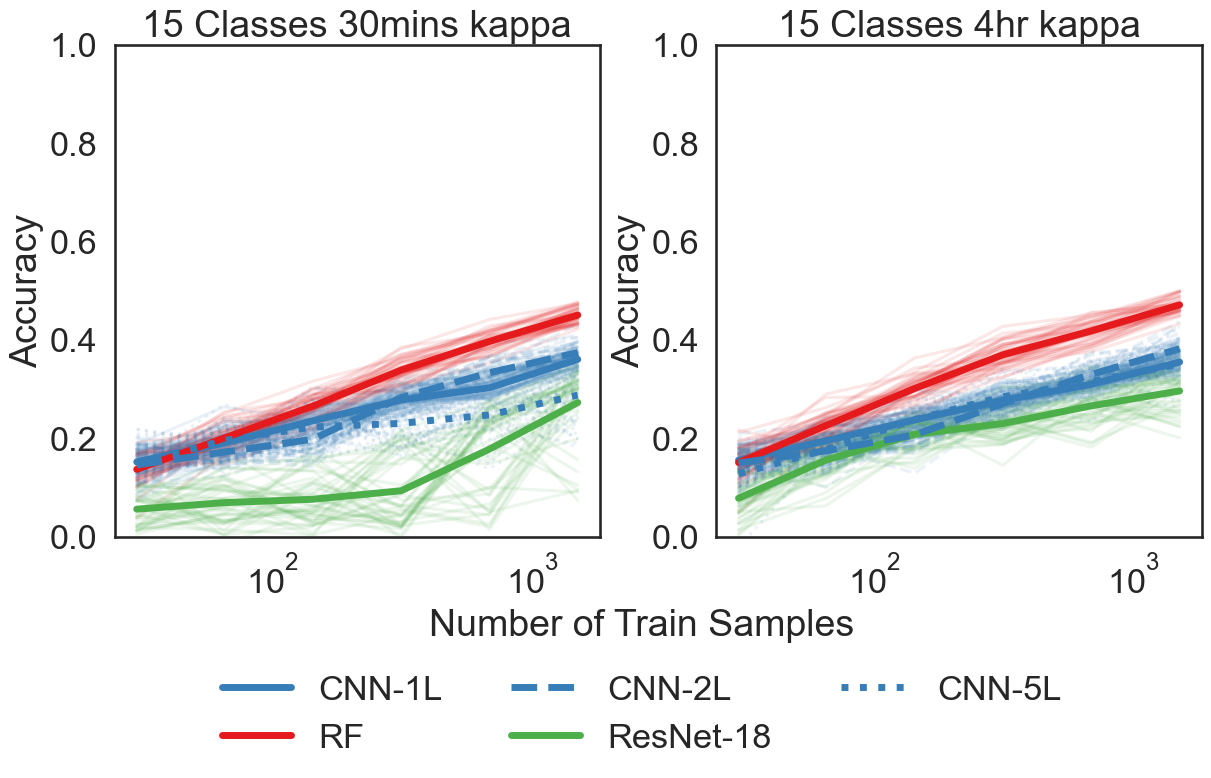

In [60]:
acc_15_30mins_kappa = [
    load_result(directory + "15_class/naive_rf_kappa_30mins.txt"),
    load_result(directory + "15_class/cnn32_kappa_30mins.txt"),
    load_result(directory + "15_class/cnn32_2l_kappa_30mins.txt"),
    load_result(directory + "15_class/cnn32_5l_kappa_30mins.txt"),
    load_result(directory + "15_class/resnet18_kappa_30mins.txt"),
]

acc_15_4hr_kappa = [
    load_result(directory + "15_class/naive_rf_kappa_4hr.txt"),
    load_result(directory + "15_class/cnn32_kappa_4hr.txt"),
    load_result(directory + "15_class/cnn32_2l_kappa_4hr.txt"),
    load_result(directory + "15_class/cnn32_5l_kappa_4hr.txt"),
    load_result(directory + "15_class/resnet18_kappa_4hr.txt"),
]

best = [acc_15_30mins_kappa, acc_15_4hr_kappa]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(30, 1500, num=6, dtype=int)

xtitles = ["15 Classes 30mins kappa", "15 Classes 4hr kappa"]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim([0, 1])
    col.set_ylabel("Accuracy")
    # col.set_xlim([10, 2000])

    # Label x axis and plot figures
    if i == 0:
        plot_acc(col, best, i)
    else:
        plot_acc(col, best, i)
    col.set_title(xtitles[i])
    # plot_acc(col, best, i)
    # if i == 0:
    #     col.set_ylabel("Accuracy")
        
fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/30mins_vs_4hr_15class_kappa.pdf", transparent=True, bbox_inches="tight")

## DF/DN with Mel-Spectrogram

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-1, 1e7]]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, accs_mel, i)

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/mel.pdf", transparent=True, bbox_inches="tight")

## DF/DN with MFCC

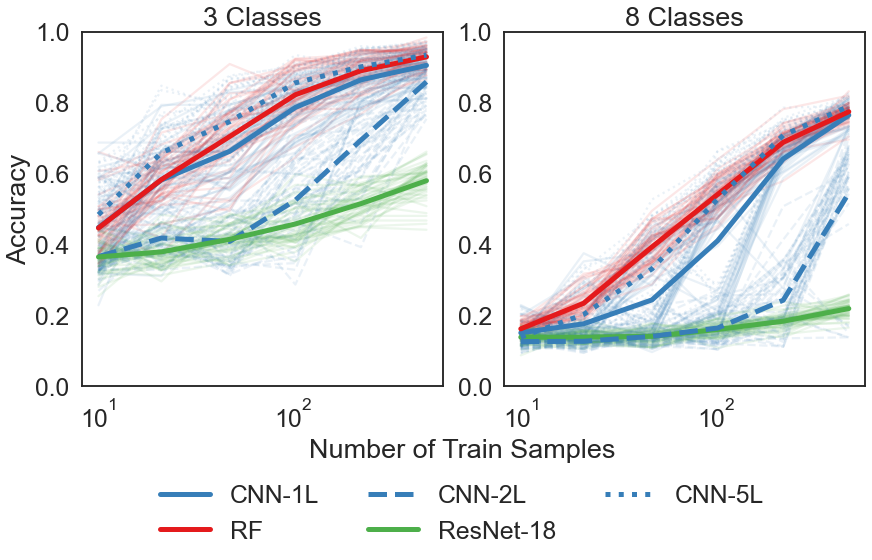

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), constrained_layout=True)

fig.text(0.53, -0.05, "Number of Train Samples", ha="center")
samples_space = np.geomspace(10, 480, num=6, dtype=int)
xtitles = ["3 Classes", "8 Classes"]
ytitles = ["Accuracy", "Wall Time (s)"]
ylimits = [[0, 1], [1e-1, 1e7]]
yticks = [[0, 0.5, 1], [1e-1, 1e1, 1e3]]

for i, col in enumerate(ax):
    col.set_xscale("log")
    col.set_ylim(ylimits[0])

    # Label x axis and plot figures
    if i == 0:
        col.set_ylabel("Accuracy")
    col.set_title(xtitles[i])
    plot_acc(col, accs_mfcc, i)

fig.align_ylabels(
    ax[
        :,
    ]
)

leg = fig.legend(
    bbox_to_anchor=(0.53, -0.3),
    bbox_transform=plt.gcf().transFigure,
    ncol=3,
    loc="lower center",
)
leg.get_frame().set_linewidth(0.0)
for legobj in leg.legend_handles:
    legobj.set_linewidth(5.0)
plt.savefig("../paper/figures/mfcc.pdf", transparent=True, bbox_inches="tight")